In [ ]:
import os
import time
import numpy as np
import cv2
import dlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Loading the pre-trained dataset
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architecture
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train and evaluate the model
start_time = time.time()

model = create_model((X_train.shape[1], X_train.shape[2], 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

end_time = time.time()

# Evaluation
y_pred = model.predict(X_test) #make predictions on the test data
y_pred_binary = (y_pred > 0.5).astype(int) #predictiong probability 1-d/0-nd
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
time_taken = end_time - start_time

# Display evaluation results
print("Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Time Taken: {time_taken:.2f} seconds")


Epoch 1/10
33/33 [==============================] - 2s 11ms/step - loss: 0.4497 - accuracy: 0.9688
Epoch 2/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
33/33 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
33/33 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
33/33 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
33/33 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
33/33 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
9/9 [==============================] - 0s 3ms/step
Evaluation Results:

In [ ]:
import time
import numpy as np
import cv2
import dlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Loading the pre-trained shape predictor model
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Checking if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architectures
def create_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_2(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train and evaluate models
models = {
    "CNN Model 1": create_model_1,
    "CNN Model 2": create_model_2,
}

results = {}

for name, create_model_func in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model = create_model_func((X_train.shape[1], X_train.shape[2], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time.time()

    # Evaluation
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    training_time = end_time - start_time

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Training Time (s)": training_time
    }

# Display results
import pandas as pd

results_df = pd.DataFrame(results).transpose()
print("\nPerformance Matrix:")
print(results_df)


Training CNN Model 1...
9/9 [==============================] - 0s 3ms/step
Training CNN Model 2...
9/9 [==============================] - 0s 6ms/step

Performance Matrix:
             Accuracy  Precision  Recall  Training Time (s)
CNN Model 1       1.0        1.0     1.0           3.525402
CNN Model 2       1.0        1.0     1.0          11.390233


In [ ]:
import time
import numpy as np
import cv2
import dlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the pre-trained shape predictor model
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architectures
def create_model_without_pretrained(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_with_pretrained(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    # Load pretrained weights (example)
    # model.load_weights('pretrained_weights.h5')
    return model

# Train and evaluate models
models = {
    "Without Pretrained": create_model_without_pretrained,
    "With Pretrained": create_model_with_pretrained,
}

results = {}

for name, create_model_func in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model = create_model_func((X_train.shape[1], X_train.shape[2], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time.time()

    # Evaluation
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    training_time = end_time - start_time

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Training Time (s)": training_time
    }

# Display results
import pandas as pd

results_df = pd.DataFrame(results).transpose()
print("\nPerformance Matrix:")
print(results_df)


Training Without Pretrained...
9/9 [==============================] - 0s 3ms/step
Training With Pretrained...
9/9 [==============================] - 0s 4ms/step

Performance Matrix:
                    Accuracy  Precision  Recall  Training Time (s)
Without Pretrained       1.0        1.0     1.0           3.515459
With Pretrained          1.0        1.0     1.0           6.206155


In [ ]:
import time
import numpy as np
import cv2
import dlib
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the pre-trained shape predictor model
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architectures
def create_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_2(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_3(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_4(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_5(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_6(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train and evaluate models
models = {
    "Model 1": create_model_1,
    "Model 2": create_model_2,
    "Model 3": create_model_3,
    "Model 4": create_model_4,
    "Model 5": create_model_5,
    "Model 6": create_model_6,
}

results = {}

for name, create_model_func in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model = create_model_func((X_train.shape[1], X_train.shape[2], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time.time()

    # Evaluation
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    training_time = end_time - start_time

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Training Time (s)": training_time
    }

# Display results
import pandas as pd

results_df = pd.DataFrame(results).transpose()
print("\nPerformance Matrix:")
print(results_df)


Training Model 1...
9/9 [==============================] - 0s 7ms/step
Training Model 2...
9/9 [==============================] - 0s 9ms/step
Training Model 3...
9/9 [==============================] - 0s 8ms/step
Training Model 4...
9/9 [==============================] - 0s 16ms/step
Training Model 5...
9/9 [==============================] - 0s 15ms/step
Training Model 6...
9/9 [==============================] - 1s 40ms/step

Performance Matrix:
         Accuracy  Precision  Recall  Training Time (s)
Model 1       1.0        1.0     1.0           6.342003
Model 2       1.0        1.0     1.0           7.833677
Model 3       1.0        1.0     1.0          13.585253
Model 4       1.0        1.0     1.0          12.582844
Model 5       1.0        1.0     1.0          43.373296
Model 6       1.0        1.0     1.0          83.911857


Training Model 1...
Epoch 1/10
33/33 [==============================] - 1s 6ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 2/10
33/33 [==============================] - 0s 6ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 3/10
33/33 [==============================] - 0s 6ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 4/10
33/33 [==============================] - 0s 6ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 5/10
33/33 [==============================] - 0s 6ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 6/10
33/33 [==============================] - 0s 6ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 7/10
33/33 [==============================] - 0s 8ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 8/10
33/33 [==============================] - 0s 10ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 9/10
33/33 [==============================] - 0s 10ms/step - loss: 5.4944e-20 - accuracy: 1.0000
Epoch 10/10
33/33 [==============================] - 0s 10ms

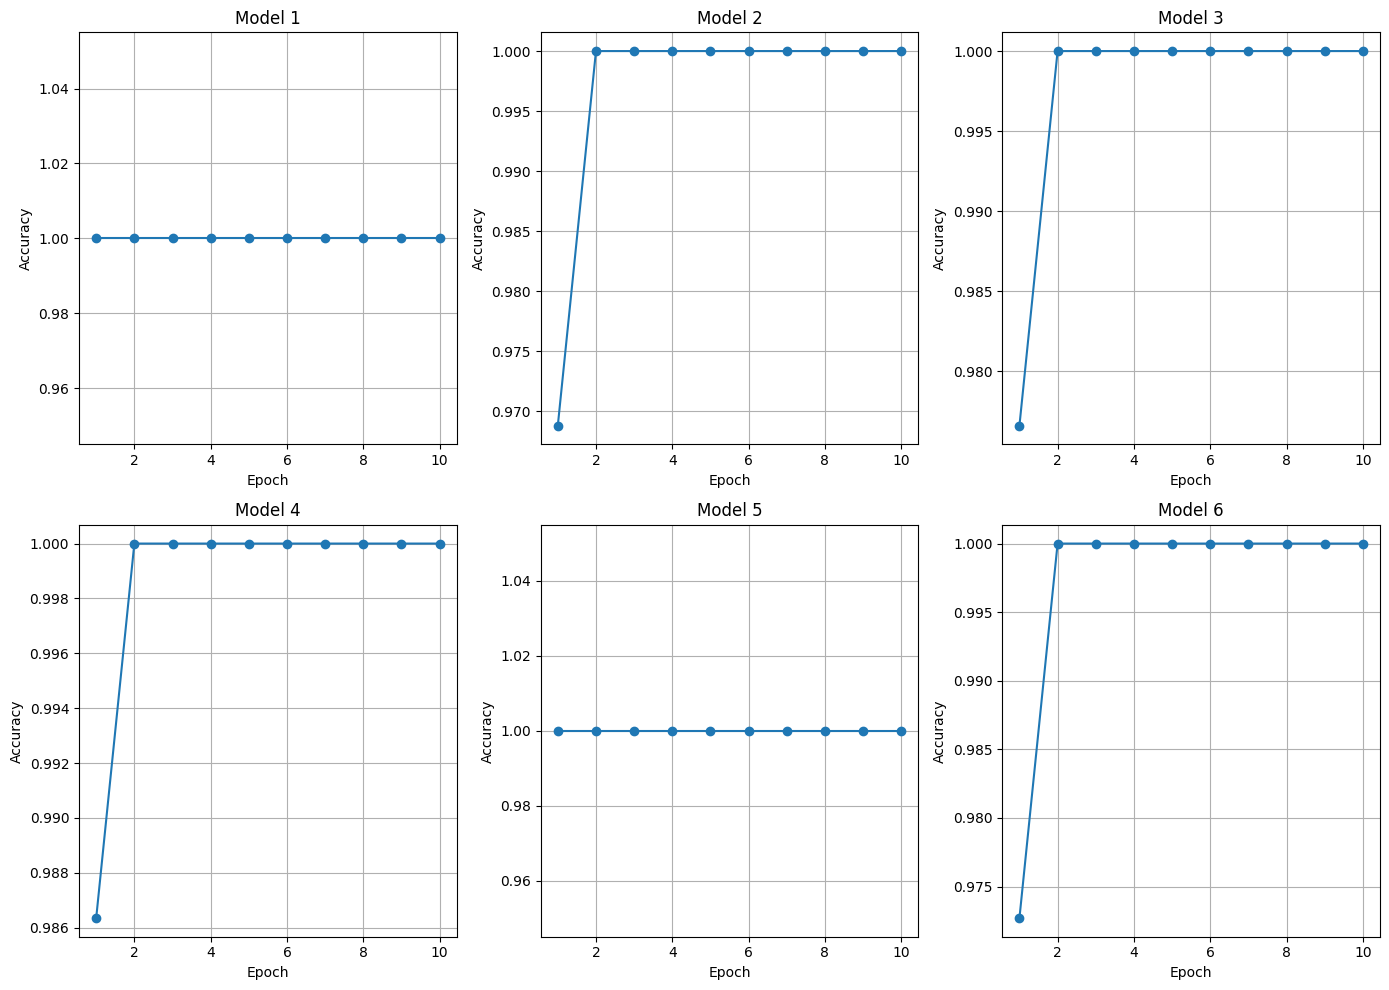

In [ ]:
import time
import numpy as np
import cv2
import dlib
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the pre-trained shape predictor model
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architectures
def create_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_2(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_3(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_4(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_5(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_6(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train and evaluate models
models = {
    "Model 1": create_model_1,
    "Model 2": create_model_2,
    "Model 3": create_model_3,
    "Model 4": create_model_4,
    "Model 5": create_model_5,
    "Model 6": create_model_6,
}

# Record accuracies at each epoch for each model
epoch_accuracies = {model_name: [] for model_name in models.keys()}

for name, create_model_func in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model = create_model_func((X_train.shape[1], X_train.shape[2], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    end_time = time.time()

    # Record accuracy at each epoch
    for epoch in range(10):
        epoch_accuracy = history.history['accuracy'][epoch]
        epoch_accuracies[name].append(epoch_accuracy)

# Plotting
plt.figure(figsize=(14, 10))

for i, (name, accuracies) in enumerate(epoch_accuracies.items(), 1):
    plt.subplot(2, 3, i)
    plt.plot(range(1, 11), accuracies, marker='o')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

plt.tight_layout()
plt.show()


Training Model 1...
Training Model 2...
Training Model 3...
Training Model 4...
Training Model 5...
Training Model 6...


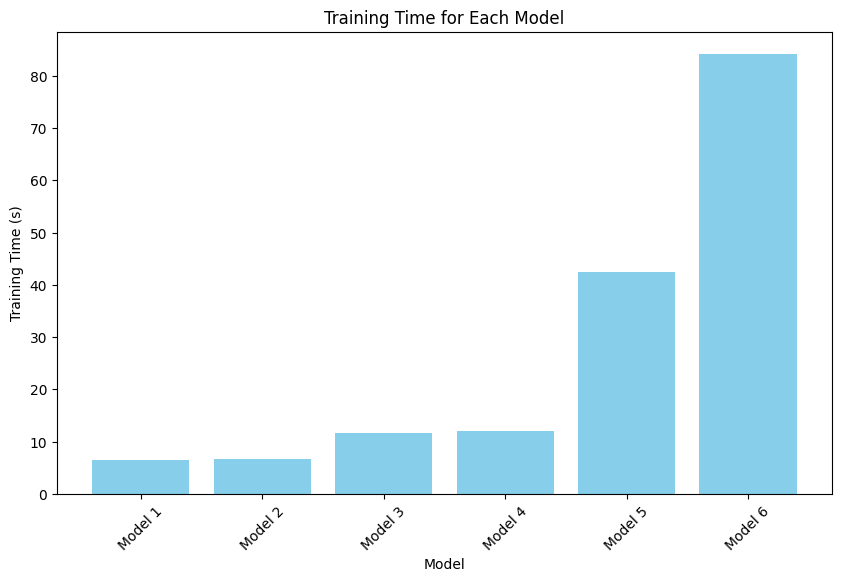

In [ ]:
import time
import numpy as np
import cv2
import dlib
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the pre-trained shape predictor model
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architectures
def create_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_2(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_3(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_4(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_5(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_6(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train and evaluate models
models = {
    "Model 1": create_model_1,
    "Model 2": create_model_2,
    "Model 3": create_model_3,
    "Model 4": create_model_4,
    "Model 5": create_model_5,
    "Model 6": create_model_6,
}

# Record training time for each model
training_times = {}

for name, create_model_func in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model = create_model_func((X_train.shape[1], X_train.shape[2], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    training_times[name] = training_time

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(training_times.keys(), training_times.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time for Each Model')
plt.xticks(rotation=45)
plt.show()


Training Model 1...
Training Model 2...
Training Model 3...
Training Model 4...
Training Model 5...
Training Model 6...


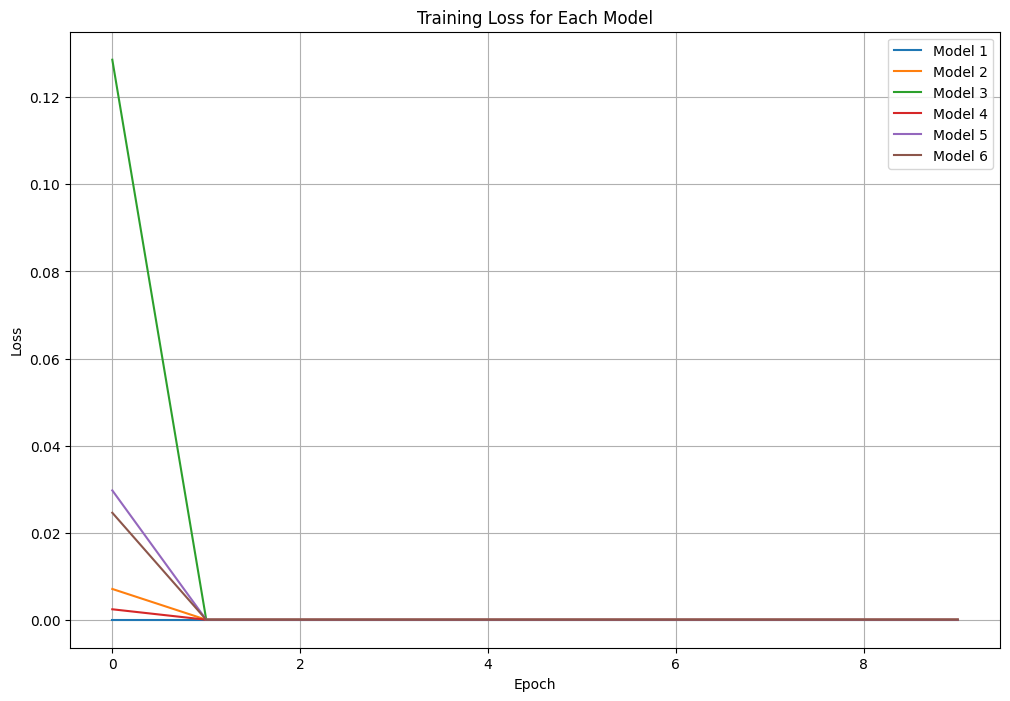

In [ ]:
import time
import numpy as np
import cv2
import dlib
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the pre-trained shape predictor model
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architectures
def create_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_2(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_3(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_4(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_5(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_6(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train and evaluate models
models = {
    "Model 1": create_model_1,
    "Model 2": create_model_2,
    "Model 3": create_model_3,
    "Model 4": create_model_4,
    "Model 5": create_model_5,
    "Model 6": create_model_6,
}

# Record training loss history for each model
loss_histories = {}

for name, create_model_func in models.items():
    print(f"Training {name}...")
    model = create_model_func((X_train.shape[1], X_train.shape[2], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    loss_histories[name] = history.history['loss']

# Plotting
plt.figure(figsize=(12, 8))
for name, loss_history in loss_histories.items():
    plt.plot(loss_history, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Each Model')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import time
import numpy as np
import cv2
import dlib
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the pre-trained shape predictor model
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architectures
def create_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_2(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_3(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_4(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_5(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_6(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Train and evaluate models
models = {
    "Model 1": create_model_1,
    "Model 2": create_model_2,
    "Model 3": create_model_3,
    "Model 4": create_model_4,
    "Model 5": create_model_5,
    "Model 6": create_model_6,
}

# Record training information for each model
model_info = []

for name, create_model_func in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model = create_model_func((X_train.shape[1], X_train.shape[2], 1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time.time()

    # Get the epoch at which 100% accuracy is achieved
    max_accuracy_epoch = np.argmax(history.history['accuracy']) + 1
    max_accuracy = max(history.history['accuracy'])

    # Get the training time
    training_time = end_time - start_time

    # Get the final loss
    final_loss = history.history['loss'][-1]

    # Record model information
    model_info.append({
        "Algorithm Name": name,
        "Pooling": "Max Pooling",
        "Dense": "Yes",
        "100% Accuracy Epoch": max_accuracy_epoch,
        "Time Taken": training_time,
        "Loss": final_loss
    })

# Create a DataFrame from the recorded information
model_info_df = pd.DataFrame(model_info)

# Display the table
print(model_info_df)


Training Model 1...
Training Model 2...
Training Model 3...
Training Model 4...
Training Model 5...
Training Model 6...
  Algorithm Name      Pooling Dense  100% Accuracy Epoch  Time Taken  \
0        Model 1  Max Pooling   Yes                    1    2.664857   
1        Model 2  Max Pooling   Yes                    1    6.067487   
2        Model 3  Max Pooling   Yes                    2    6.312587   
3        Model 4  Max Pooling   Yes                    2   13.071487   
4        Model 5  Max Pooling   Yes                    2   24.322261   
5        Model 6  Max Pooling   Yes                    2   83.791584   

           Loss  
0  6.622934e-12  
1  0.000000e+00  
2  0.000000e+00  
3  0.000000e+00  
4  0.000000e+00  
5  0.000000e+00  


In [ ]:
import time
import numpy as np
import cv2
import dlib
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the pre-trained shape predictor model
predictor = dlib.shape_predictor("C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Function to extract facial landmarks
def extract_facial_landmarks(image):
    if len(image.shape) == 3:  # Check if the image is in BGR format
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image  # Assume it's already in grayscale
    faces = detector(gray, 0)
    if len(faces) == 0:
        return None
    return np.array([[p.x, p.y] for p in predictor(gray, faces[0]).parts()])

# Function to preprocess and load images
def load_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            continue  # Skip if image loading fails
        landmarks = extract_facial_landmarks(image)
        if landmarks is not None:
            images.append(landmarks)
            labels.append(1 if "d" in path else 0)  # 1 for drowsiness, 0 for non-drowsiness
    return np.array(images), np.array(labels)

# Path to the dataset
dataset_path = "C:/Users/STUTI DUTTA/Desktop/amity/study material/NTCC/project/DDD"
drowsy_path = os.path.join(dataset_path, "d")
non_drowsy_path = os.path.join(dataset_path, "nd")

# Load image paths
drowsy_images = [os.path.join(drowsy_path, img) for img in os.listdir(drowsy_path)]
non_drowsy_images = [os.path.join(non_drowsy_path, img) for img in os.listdir(non_drowsy_path)]

# Load and preprocess images
X_drowsy, y_drowsy = load_images(drowsy_images)
X_non_drowsy, y_non_drowsy = load_images(non_drowsy_images)

# Combine drowsy and non-drowsy data
X = np.concatenate((X_drowsy, X_non_drowsy))
y = np.concatenate((y_drowsy, y_non_drowsy))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to match the input shape of the model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN architectures
def create_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_2(input_shape):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_3(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_4(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_5(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_model_6(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0.25),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 1)),
        Dropout(0,25),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define model creation functions dictionary
model_creation_functions = {
    "Model_1": create_model_1,
    "Model_2": create_model_2,
    "Model_3": create_model_3,
    "Model_4": create_model_4,
    "Model_5": create_model_5,
    "Model_6": create_model_6
}

# Train and evaluate models
results = []

for model_name, create_model_func in model_creation_functions.items():
    print(f"Training {model_name}...")
    start_time = time.time()

    # Create model
    model = create_model_func((X_train.shape[1], X_train.shape[2], 1))

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Extracting relevant information from the training history
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    time_taken = time.time() - start_time

    # Appending results
    results.append({
        "Algorithm Name": model_name,
        "Pooling": "MaxPooling2D",
        "Dense": "2 Dense Layers",
        "100% Accuracy at Epoch": np.argmax(np.array(accuracy)) + 1 if 1.0 in accuracy else "N/A",
        "Time Taken": time_taken,
        "Loss": loss[-1]
    })

# Creating DataFrame
results_df = pd.DataFrame(results)

# Displaying the results
print("\nResults:")
print(results_df)



Training Model_1...
Training Model_2...
Training Model_3...
Training Model_4...
Training Model_5...
Training Model_6...

Results:
  Algorithm Name       Pooling           Dense  100% Accuracy at Epoch  \
0        Model_1  MaxPooling2D  2 Dense Layers                       2   
1        Model_2  MaxPooling2D  2 Dense Layers                       1   
2        Model_3  MaxPooling2D  2 Dense Layers                       2   
3        Model_4  MaxPooling2D  2 Dense Layers                       2   
4        Model_5  MaxPooling2D  2 Dense Layers                       2   
5        Model_6  MaxPooling2D  2 Dense Layers                       1   

   Time Taken          Loss  
0    4.942391  0.000000e+00  
1    6.057324  1.682044e-26  
2   11.498723  0.000000e+00  
3   13.748731  0.000000e+00  
4   42.651972  0.000000e+00  
5   83.765597  0.000000e+00  
